In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch

from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('data/Mall_Customers.csv')

In [5]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


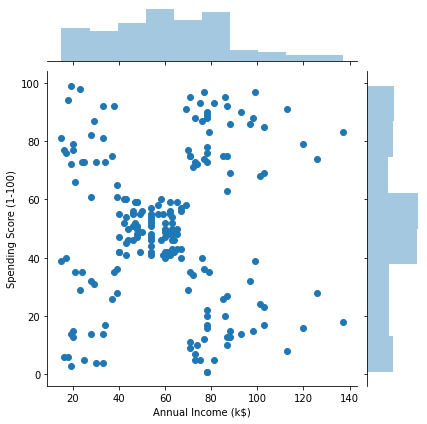

In [6]:
# Take a look at the data to get an idea of possible number of clusters
sns.jointplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)')
plt.show()

In [7]:
X=df.iloc[:,[3,4]].values

### KMeans - Using inertia and elbow method to select optimal number of clusters.

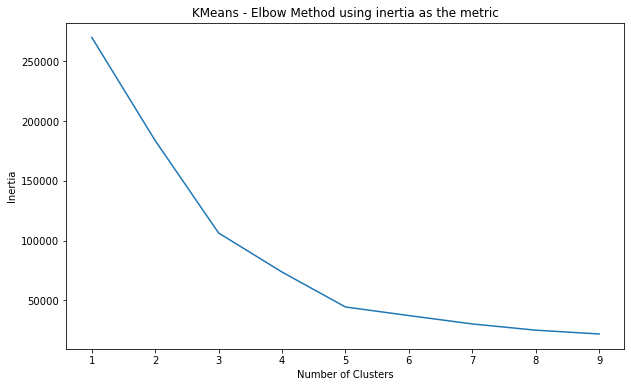

In [8]:
inertia = []

for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10), inertia)   
plt.title('KMeans - Elbow Method using inertia as the metric')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

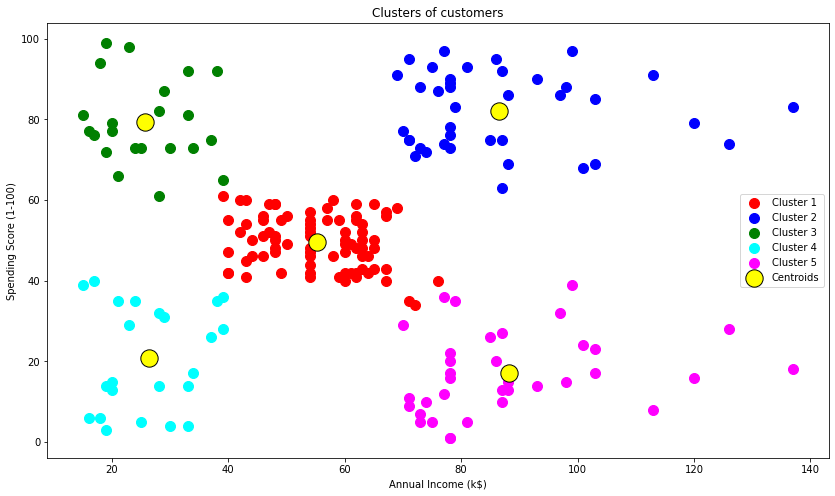

In [9]:
# Choose cluster=5 and train the model on the dataset
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

# Visualising these clusters
plt.figure(figsize=(14,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids'
           ,edgecolors='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### KMeans - Using silhouette score to select optimal number of clusters.

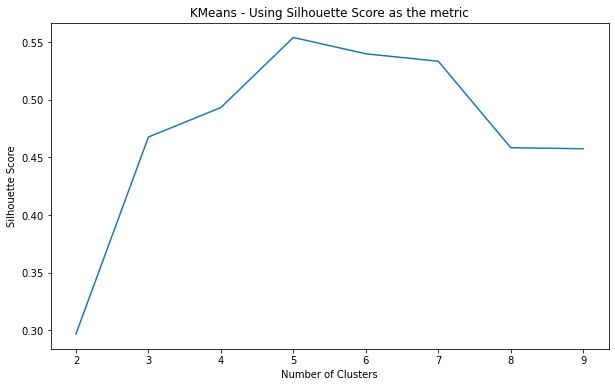

In [10]:
silhouette = []

for i in range(2,10):
    kmeans= KMeans(n_clusters=i, init='k-means++')
    kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(2,10), silhouette)   
plt.title('KMeans - Using Silhouette Score as the metric')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# +1 - Instance is well inside its own cluster
#  0 - Instance is close to a cluster boundary
# -1 - Instance may be assigned wrong cluster

### KMeans - Using all model features

In [11]:
def convert_sex(genre):
    """ Converts genre column into sex (1= male, 0=female). """
    if genre=='Male':
        return 1
    else:
        return 0
    
df['Sex']= df['Genre'].apply(convert_sex)
X = df.drop(['CustomerID','Genre'], axis=1).values

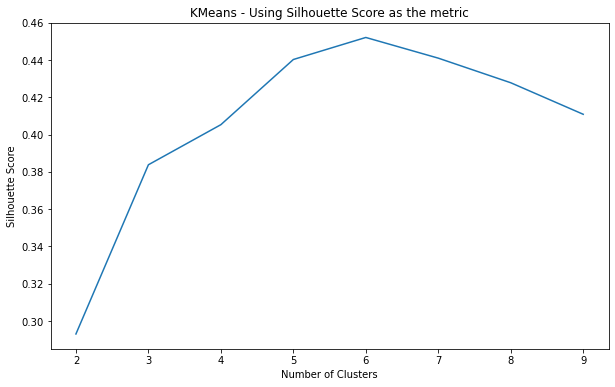

In [12]:
# Use silhouette score
silhouette = []

for i in range(2,10):
    kmeans= KMeans(n_clusters=i, init='k-means++')
    kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette.append(score)

# Visualize the results    
plt.figure(figsize=(10,6))
plt.plot(range(2,10), silhouette)   
plt.title('KMeans - Using Silhouette Score as the metric')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

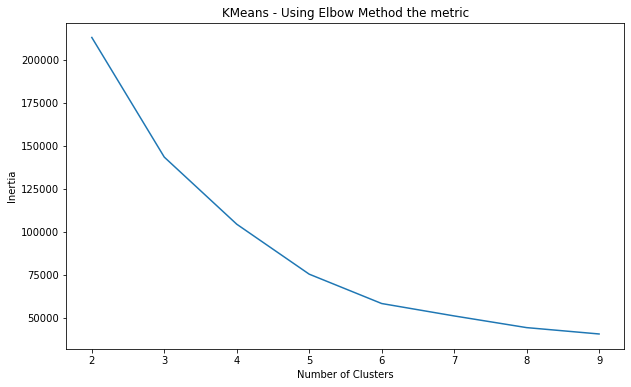

In [13]:
# Use elbow method
elbow = []

for i in range(2,10):
    kmeans= KMeans(n_clusters=i, init='k-means++')
    kmeans.fit_predict(X)
    score = kmeans.inertia_
    elbow.append(score)

# Visualize the results    
plt.figure(figsize=(10,6))
plt.plot(range(2,10), elbow)   
plt.title('KMeans - Using Elbow Method the metric')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Gaussian Mixture Model

In [14]:
gm = GaussianMixture(n_components=5, n_init=10).fit(X)
print(gm.converged_)
print(gm.n_iter_)

True
7


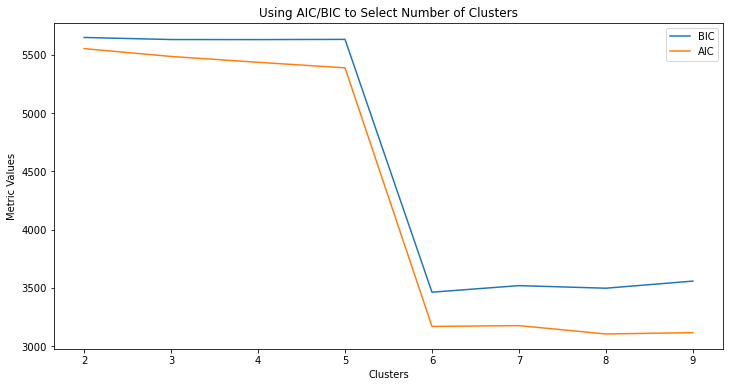

In [15]:
BIC_LIST = []
AIC_LIST = []

for i in range (2,10):
    gm = GaussianMixture(n_components=i, n_init=10).fit(X)
    # Add metrics
    aic = gm.aic(X)
    bic = gm.bic(X)
    BIC_LIST.append(bic)
    AIC_LIST.append(aic)

plt.figure(figsize=(12,6))
plt.plot(range(2,10),BIC_LIST, label='BIC')
plt.plot(range(2,10), AIC_LIST, label='AIC')
plt.legend()
plt.title('Using AIC/BIC to Select Number of Clusters')
plt.ylabel("Metric Values")
plt.xlabel('Clusters')
plt.show()


### Using Gaussian Mixture to detect anomolies

In [16]:
gm = GaussianMixture(n_components=6, n_init=10).fit(X)

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 5) # Flag 5% as outliers
anomolies = X[densities < density_threshold]

print(f"Number of Outliers: {len(anomolies)}")
print(f"Outliers: {anomolies}")

Number of Outliers: 10
Outliers: [[ 19  15  39   1]
 [ 20  16   6   0]
 [ 67  19  14   1]
 [ 65  38  35   0]
 [ 57  75   5   0]
 [ 56  79  35   0]
 [ 41  99  39   0]
 [ 47 120  16   0]
 [ 32 137  18   1]
 [ 30 137  83   1]]


### Hierarchial Clustering - Visualize Dendogram w/ Euclidean Distance as metric

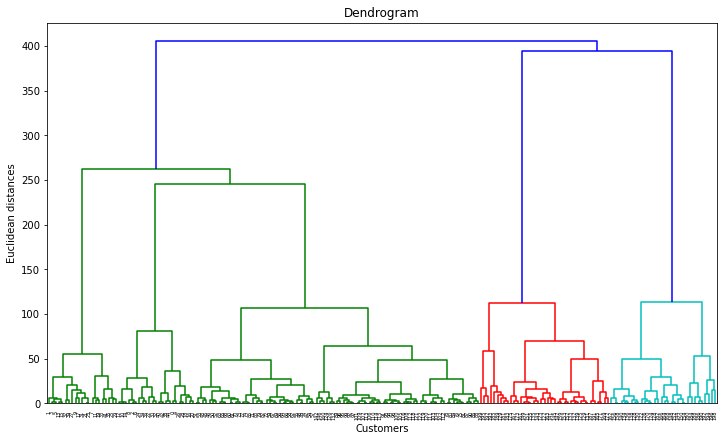

In [27]:
# Only use the 2 features in order to create some visuals
X=df.iloc[:,[3,4]].values

# Graph dendogram
plt.figure(figsize=(12,7))
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
# Estimate optimal number of clusters = 5 from the dendogram

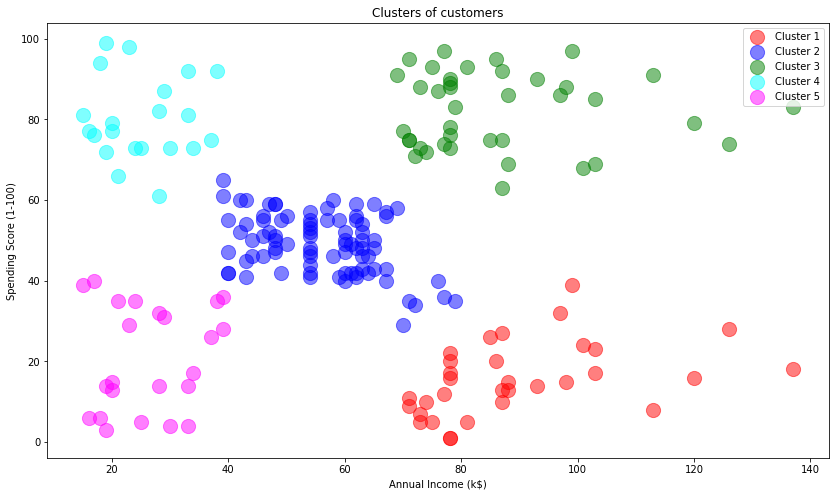

In [42]:
# Fit to HCA model again only using 2 features in order to visualize
X=df.iloc[:,[3,4]].values

hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

#Graph Clusters
plt.figure(figsize=(14,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 200, c = 'red', label = 'Cluster 1', alpha = 0.5)
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 200, c = 'blue', label = 'Cluster 2', alpha = 0.5)
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 200, c = 'green', label = 'Cluster 3', alpha = 0.5)
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 200, c = 'cyan', label = 'Cluster 4', alpha = 0.5)
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 200, c = 'magenta', label = 'Cluster 5', alpha = 0.5)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Hierarchial Model with all features

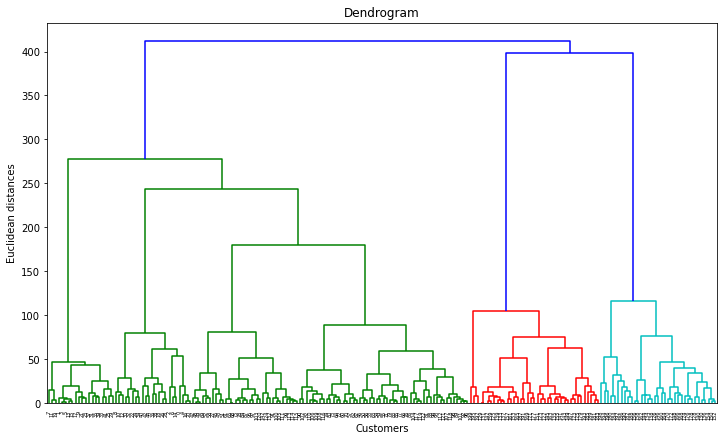

In [36]:
df = pd.read_csv('data/Mall_Customers.csv')

def convert_sex(genre):
    """ Converts genre column into sex (1= male, 0=female). """
    if genre=='Male':
        return 1
    else:
        return 0
    
df['Sex']= df['Genre'].apply(convert_sex)
X = df.drop(['CustomerID','Genre'], axis=1).values

# Graph dendogram to chose optimal clusters
plt.figure(figsize=(12,7))
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# 5 or 6 Clusters look to be the optimal amount.  This is consistent with KMeans above.

array([[ 19,  15,  39,   1],
       [ 21,  15,  81,   1],
       [ 20,  16,   6,   0],
       [ 23,  16,  77,   0],
       [ 31,  17,  40,   0],
       [ 22,  17,  76,   0],
       [ 35,  18,   6,   0],
       [ 23,  18,  94,   0],
       [ 64,  19,   3,   1],
       [ 30,  19,  72,   0],
       [ 67,  19,  14,   1],
       [ 35,  19,  99,   0],
       [ 58,  20,  15,   0],
       [ 24,  20,  77,   0],
       [ 37,  20,  13,   1],
       [ 22,  20,  79,   1],
       [ 35,  21,  35,   0],
       [ 20,  21,  66,   1],
       [ 52,  23,  29,   1],
       [ 35,  23,  98,   0],
       [ 35,  24,  35,   1],
       [ 25,  24,  73,   1],
       [ 46,  25,   5,   0],
       [ 31,  25,  73,   1],
       [ 54,  28,  14,   0],
       [ 29,  28,  82,   1],
       [ 45,  28,  32,   0],
       [ 35,  28,  61,   1],
       [ 40,  29,  31,   0],
       [ 23,  29,  87,   0],
       [ 60,  30,   4,   1],
       [ 21,  30,  73,   0],
       [ 53,  33,   4,   1],
       [ 18,  33,  92,   1],
       [ 49,  